In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cuisines = pd.read_csv("modified_data.csv")
cuisines.drop('cuisine',axis = 1, inplace = True)
cuisines.drop('Unnamed: 0',axis = 1, inplace = True)
cuisines=cuisines.rename(columns=lambda x:x.replace("'",""))
cuisines

,allspice,almond,anchovy,anise,apple,arborio rice,artichoke,asparagus,assorted vegetables,avocado,...,whipping cream,white fish,white onion,wine,wine vinegar,worcestershire sauce,yeast,yogurt,zest,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
cuisines['Number of ingredients']=cuisines.apply(lambda x: x.sum(),axis = 1)
cuisines

,allspice,almond,anchovy,anise,apple,arborio rice,artichoke,asparagus,assorted vegetables,avocado,...,white fish,white onion,wine,wine vinegar,worcestershire sauce,yeast,yogurt,zest,zucchini,Number of ingredients
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
4143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
4144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


31
2
median:  0    9
dtype: int64


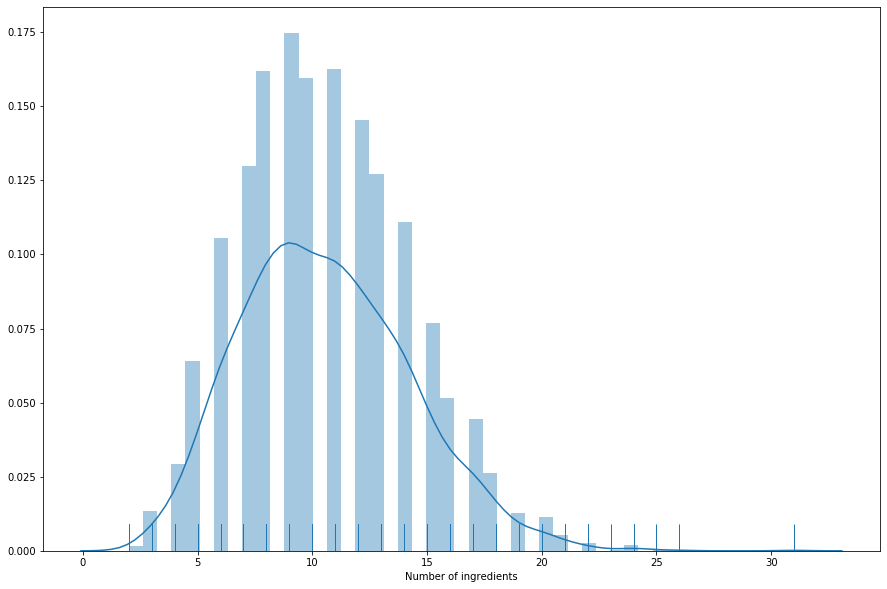

In [21]:
print(cuisines['Number of ingredients'].max())
print(cuisines['Number of ingredients'].min())
print('median: ',cuisines['Number of ingredients'].mode())



plt.figure(figsize=(15,10))
plt.tight_layout()

sns_plot = sns.distplot(cuisines["Number of ingredients"],rug=True)
fig = sns_plot.get_figure()
fig.savefig("num_distribution.pdf",bbox_inches='tight',dpi=fig.dpi,pad_inches=0.0)

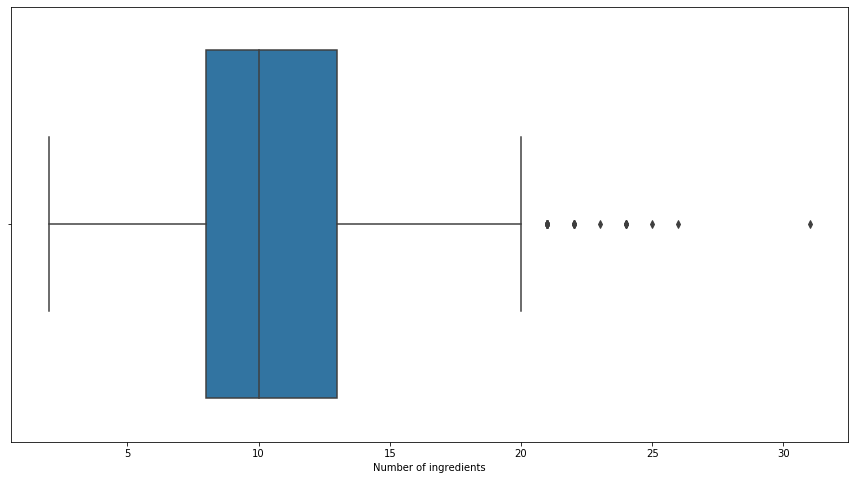

In [27]:
plt.figure(figsize=(15,8))
plt.tight_layout()
sns.boxplot(x=cuisines['Number of ingredients'])
plt.savefig("box_num.pdf",bbox_inches='tight',pad_inches=0.0)

In [29]:
from scipy.stats import skew, kurtosis
print('skew: ',skew(cuisines['Number of ingredients']))
print('kurtosis: ',kurtosis(cuisines['Number of ingredients']))


skew:  0.451704393848152
kurtosis:  0.177835943565118


In [18]:
for ind in cuisines[cuisines['Number of ingredients']<3].index:
    print(cuisines.columns[cuisines.loc[ind]==1])

Index(['apple', 'pork'], dtype='object')
Index(['garlic powder', 'salmon'], dtype='object')
Index(['lamb', 'olive oil'], dtype='object')
Index(['cream cheese', 'pasta'], dtype='object')


In [4]:
# cuisines.drop('Number of ingredients',axis = 1, inplace = True)
cuisines.loc['occurance']=cuisines.apply(lambda x: x.sum())
# cuisines.drop('occurance of ingredient',axis = 1, inplace = True)
cuisines

,allspice,almond,anchovy,anise,apple,arborio rice,artichoke,asparagus,assorted vegetables,avocado,...,whipping cream,white fish,white onion,wine,wine vinegar,worcestershire sauce,yeast,yogurt,zest,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


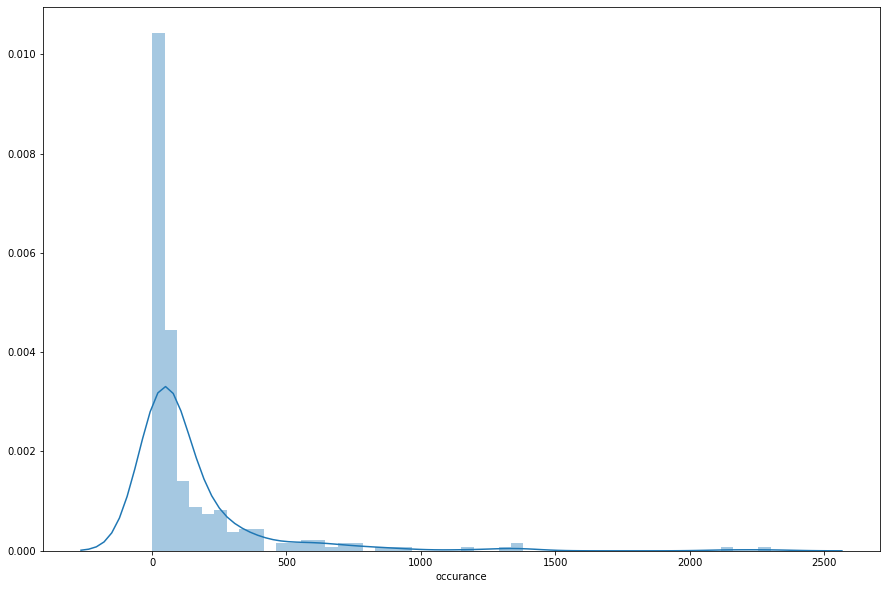

In [53]:
#drop occurance<3 
# cuisines.drop('cuisine',axis = 1, inplace = True)

plt.figure(figsize=(15,10))
sns_plot = sns.distplot(cuisines.T["occurance"],norm_hist=True)
fig = sns_plot.get_figure()
fig.savefig("occurance.pdf",bbox_inches='tight',dpi=fig.dpi,pad_inches=0.0)

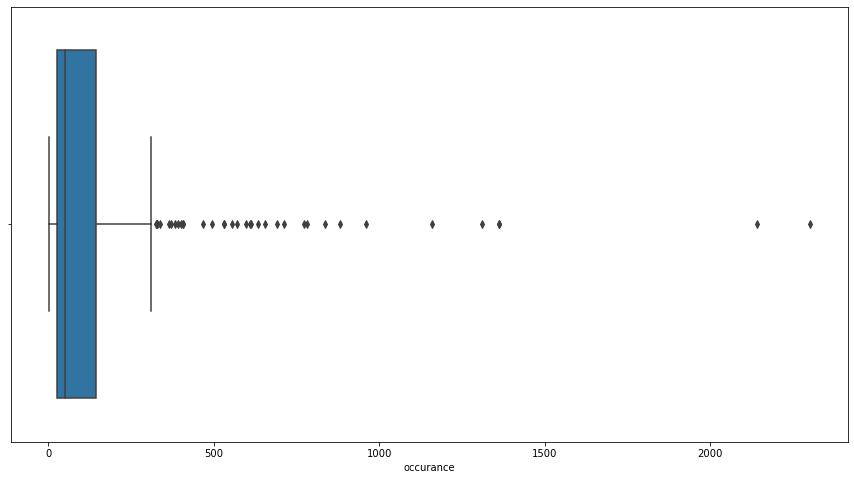

In [54]:
plt.figure(figsize=(15,8))
plt.tight_layout()
sns.boxplot(x=cuisines.T['occurance'])
plt.savefig("box_ingre.pdf",bbox_inches='tight',pad_inches=0.0)

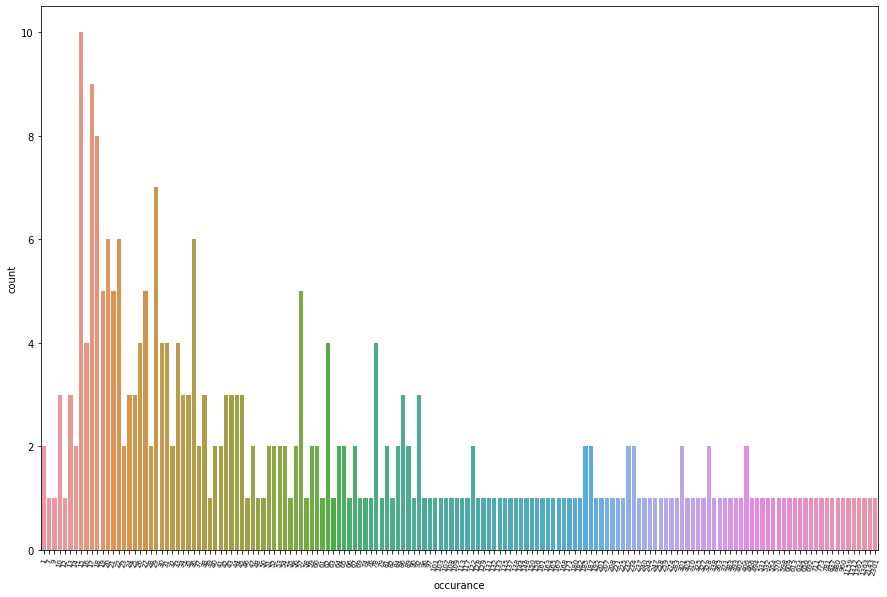

In [34]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.countplot(cuisines.T['occurance'])
plt.tick_params(axis='x',labelsize=7) 
plt.xticks(rotation=73)
plt.savefig('occurance_count.pdf',bbox_inches='tight',pad_inches=0.0)

In [5]:
sorted_cuisines = cuisines.T.sort_values(by = 'occurance',ascending = False).T
# sorted_cuisines=sorted_cuisines.T.loc[sorted_cuisines.T['occurance']>5].T
sorted_cuisines.drop('occurance', inplace=True)
top_ingre=sorted_cuisines.iloc[:,:30]
top_ingre

,garlic,onion,salt,olive oil,chicken,pepper,tomato,water,ginger,vegetable oil,...,green onion,sweet pepper,carrot,cilantro,oregano,lemon juice,mushroom,potato,chile pepper,cinnamon
0,0,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4143,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
4144,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4145,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


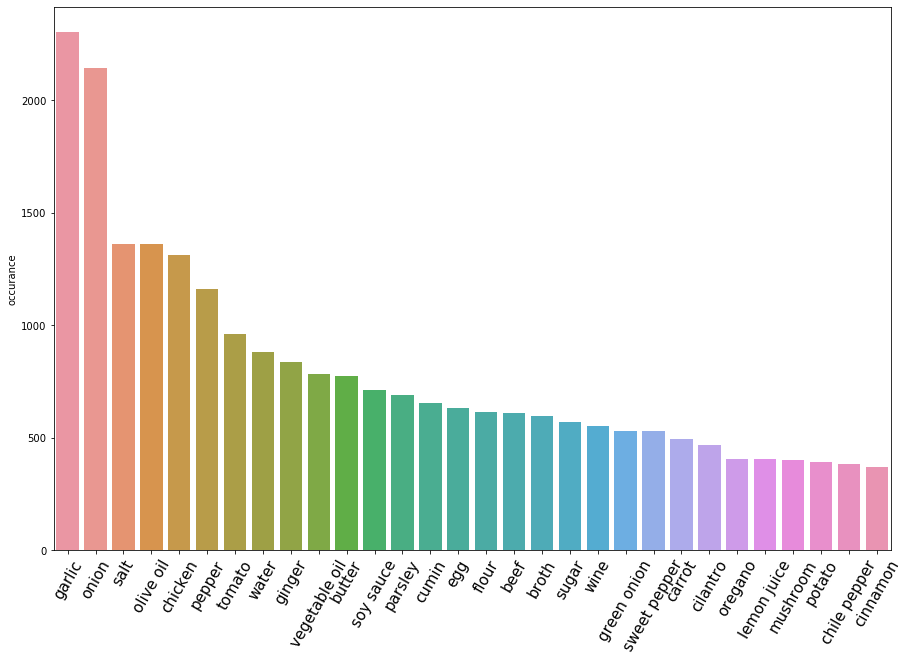

In [52]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.barplot(x=top_ingre.columns,y=top_ingre.T['occurance'])
plt.tick_params(axis='x',labelsize=15) 
plt.xticks(rotation=60)
plt.savefig('top_ingredients.pdf',bbox_inches='tight',pad_inches=0.0)

In [10]:
cuisines.T[cuisines.T['occurance']<2].T.columns

Index(['aleppo pepper', 'almond butter', 'amaretti', 'andouille sausage',
       'apple butter', 'argan oil', 'asadero', 'azuki bean', 'bagel',
       'bitter melon', 'blackberry', 'bourbon', 'brick cheese',
       'broccoli raab', 'buckwheat', 'calvados', 'caul', 'chayote',
       'cheshire cheese', 'cocoa powder', 'coleslaw mix', 'confit', 'craisin',
       'cranberry bean', 'crayfish', 'crystallized ginger', 'edamame', 'eel',
       'english muffin', 'epazote', 'fermented black bean', 'flax seed',
       'French beans', 'fresh button mushroom', 'gelatin', 'gloucester',
       'grand marnier', 'grapefruit', 'gumbo', 'havarti', 'horseradish',
       'Italian rolls', 'Italian spices', 'kamaboko', 'ketjap manis',
       'kohlrabi', 'lambs kidney', 'lancashire cheese', 'mackerel',
       'mascarpone', 'meatloaf mix', 'miracle whip dressing', 'mortadella',
       'mung beans', 'muscovado sugar', 'mustard oil', 'nectarine',
       'nigella seeds', 'papaya', 'parchment paper', 'pastry dough

In [64]:
sorted_cuisines.iloc[:,:30]

,garlic,onion,salt,olive oil,chicken,pepper,tomato,water,ginger,vegetable oil,...,green onion,sweet pepper,carrot,cilantro,oregano,lemon juice,mushroom,potato,chile pepper,cinnamon
0,0,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
4144,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4145,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4146,1,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [6]:
corr=sorted_cuisines.iloc[:,:30].corr('pearson')
corr

,garlic,onion,salt,olive oil,chicken,pepper,tomato,water,ginger,vegetable oil,...,green onion,sweet pepper,carrot,cilantro,oregano,lemon juice,mushroom,potato,chile pepper,cinnamon
garlic,1.000000,0.131018,0.036904,0.239980,0.055322,0.053975,0.198248,0.009166,0.182037,0.025633,...,0.037456,0.121062,-0.004644,0.098994,0.157925,0.086087,-0.009927,-0.033231,0.069529,0.071652
onion,0.131018,1.000000,0.054094,0.103954,-0.075732,0.086108,0.257311,0.072290,-0.045118,0.041237,...,-0.262503,0.169833,0.132164,0.018626,0.058773,-0.037028,0.039571,0.111889,-0.006531,0.171240
salt,0.036904,0.054094,1.000000,0.030988,0.005280,0.462249,0.034657,0.152888,0.017781,0.069994,...,-0.062714,0.020703,-0.005331,0.037124,0.087337,0.089064,-0.014099,-0.038854,-0.017520,0.063066
olive oil,0.239980,0.103954,0.030988,1.000000,0.039856,0.089647,0.204154,-0.067836,-0.131630,-0.315844,...,-0.131622,0.093126,-0.020993,-0.011459,0.179092,0.139354,-0.019139,0.012143,-0.106030,0.086626
chicken,0.055322,-0.075732,0.005280,0.039856,1.000000,0.024639,-0.059890,-0.046172,0.097142,0.029060,...,0.041383,0.031045,-0.035676,0.037055,-0.039165,0.062030,0.020711,-0.103270,0.040884,0.066538
pepper,0.053975,0.086108,0.462249,0.089647,0.024639,1.000000,0.048030,0.031619,-0.044080,0.003748,...,-0.044484,0.018650,-0.008398,-0.000404,0.087754,0.076905,0.017525,-0.040061,-0.053899,0.051425
tomato,0.198248,0.257311,0.034657,0.204154,-0.059890,0.048030,1.000000,0.003197,-0.043813,-0.049418,...,-0.106259,0.121612,-0.016515,0.040050,0.146233,-0.028829,-0.042626,-0.007762,0.046084,0.090373
water,0.009166,0.072290,0.152888,-0.067836,-0.046172,0.031619,0.003197,1.000000,0.106366,0.096950,...,0.003719,0.039398,0.060396,0.015152,-0.036027,-0.022135,-0.028515,0.057599,-0.002594,0.017096
ginger,0.182037,-0.045118,0.017781,-0.131630,0.097142,-0.044080,-0.043813,0.106366,1.000000,0.129645,...,0.168205,-0.009301,0.030221,0.167301,-0.153530,0.014264,-0.067287,-0.070399,0.119728,0.177074
vegetable oil,0.025633,0.041237,0.069994,-0.315844,0.029060,0.003748,-0.049418,0.096950,0.129645,1.000000,...,0.075266,0.027682,0.043726,0.041477,-0.081897,-0.046616,0.017285,0.006289,0.093453,-0.051582


<Figure size 432x288 with 0 Axes>

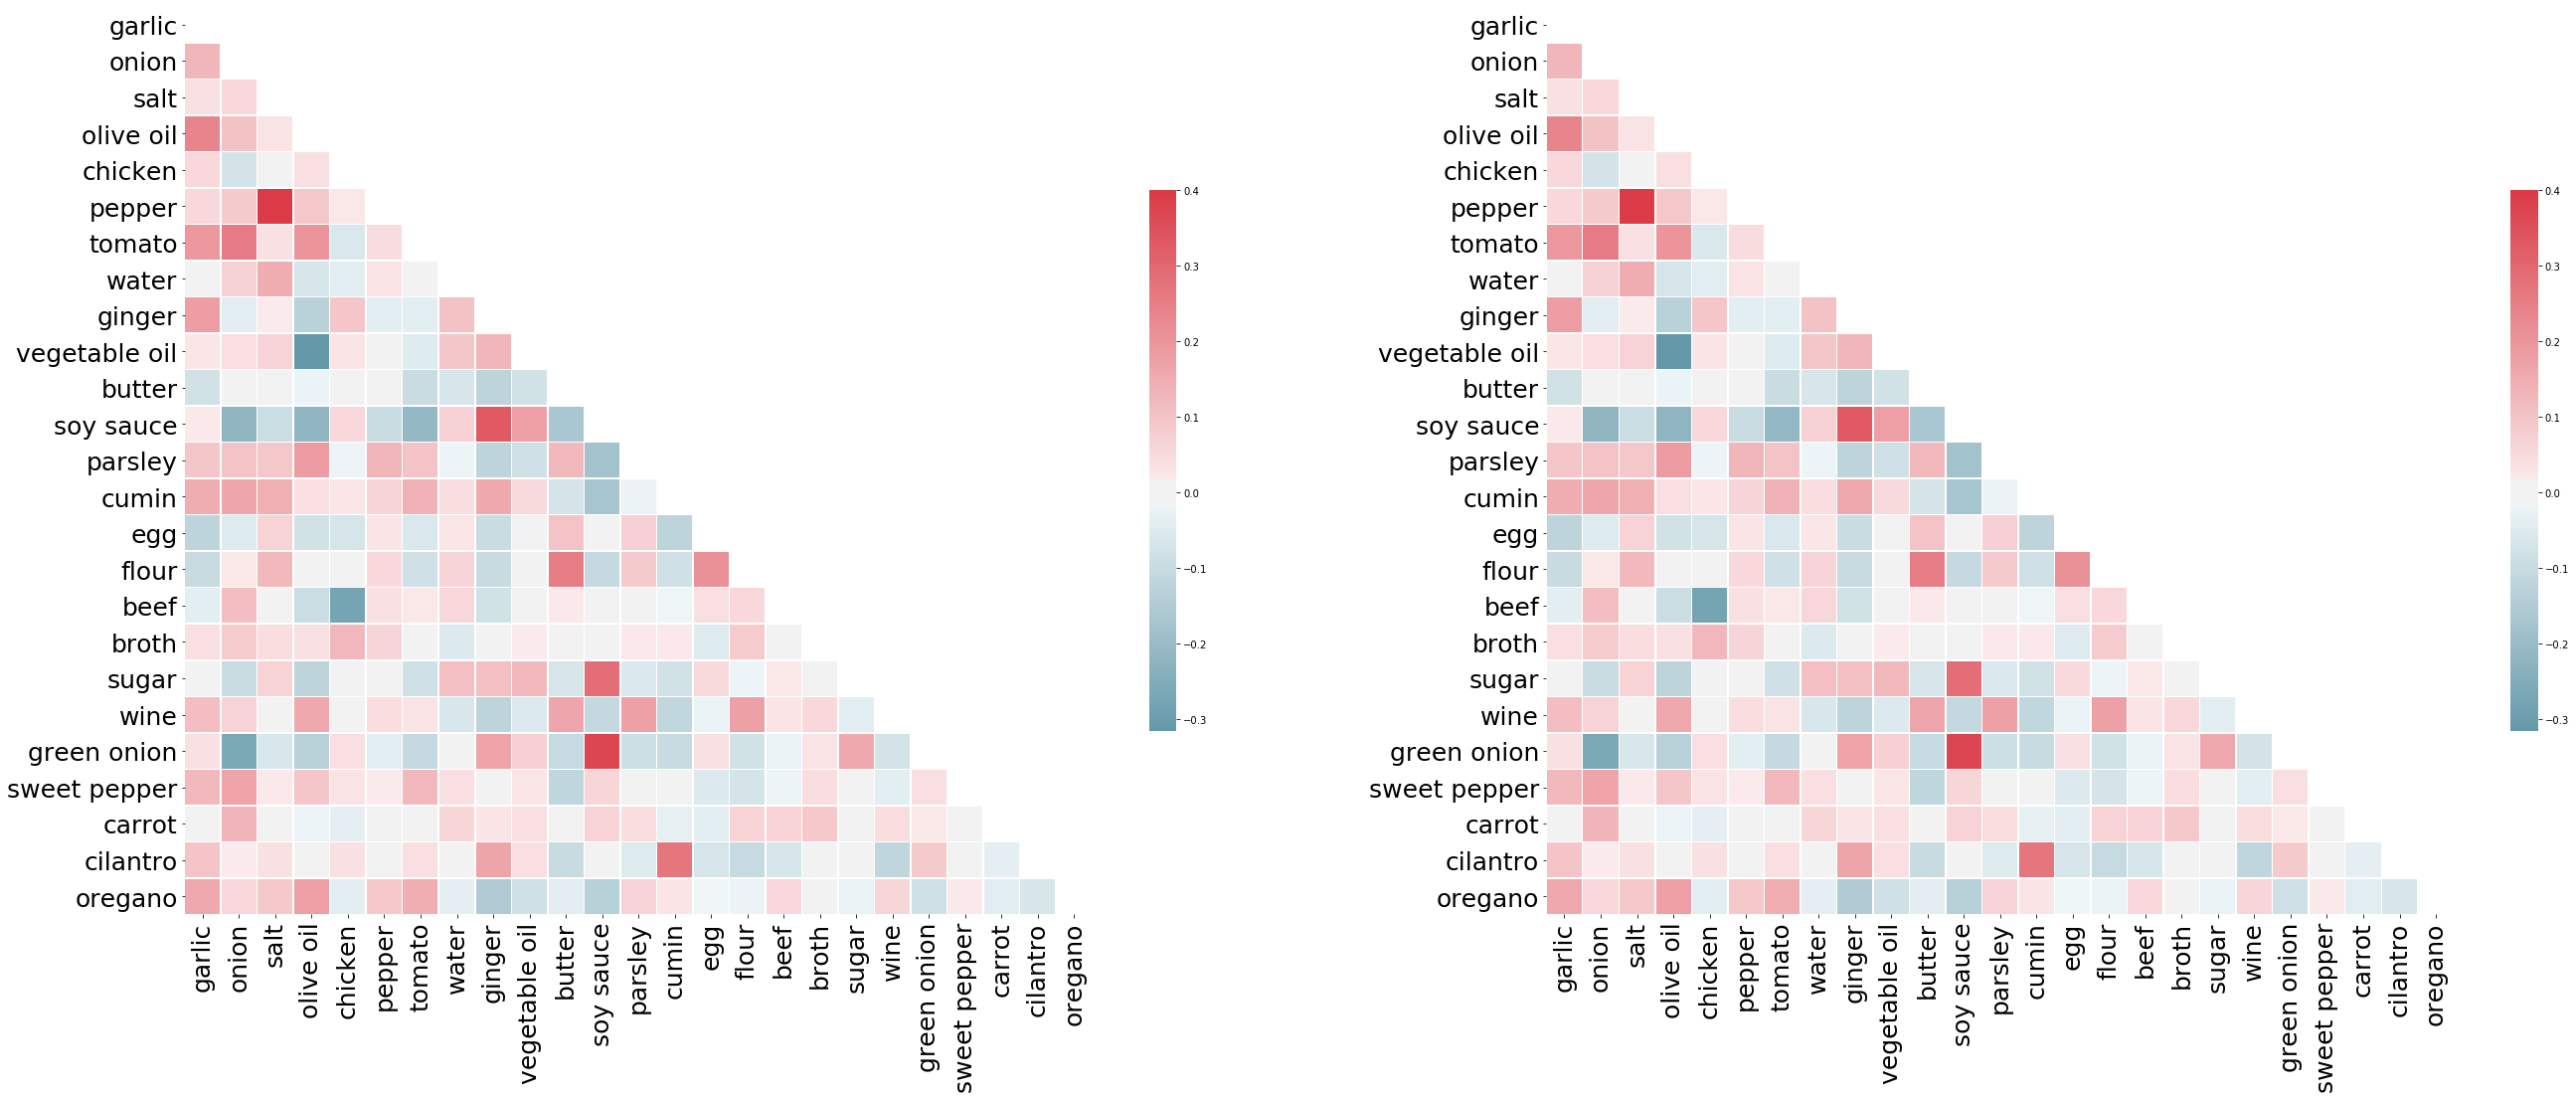

In [8]:

plt.tight_layout()
f, ax = plt.subplots(1, 2, figsize=(45, 20))
plt.tick_params(labelsize=25) 
for idx, tp in  enumerate(['pearson', 'spearman']):
    corr=sorted_cuisines.iloc[:,:25].corr(tp)
    
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[idx])
#     ax[idx].set_title(f'{tp} correlation viz')
    ax[idx].tick_params(labelsize=25) 


plt.savefig('correlation.pdf',bbox_inches='tight',pad_inches=0.0)